Installing libraries

In [1]:
#pip install pandas

import pandas as pd

# a_dataframe = pd.read_csv(filepath) or read_excel

# to_csv or to_excel for exporting

In [2]:
#pip install seaborn: data visualization (based on matplotlib)

import seaborn as sns

from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('AB_NYC_2019.csv',delimiter=',')

In [4]:
df.shape #tuple
df.columns
df.dtypes
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Cleaning the dataframe

In [5]:
df.isnull().sum() #how many nulls are found in each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Drop innecesary columns
columns_to_drop = ['id','host_name','last_review']
df.drop(columns_to_drop,axis="columns",inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
#Replace NaN (not a number)
df.fillna({'reviews_per_month':0},inplace=True)

#another option is the dropna function to delete rows with NaN

In [8]:
#Filter columns by name
df[['name','neighbourhood_group','price']]

,name,neighbourhood_group,price
0,Clean & quiet apt home by the park,Brooklyn,149
1,Skylit Midtown Castle,Manhattan,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80
...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,70
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,40
48892,Sunny Studio at Historical Neighborhood,Manhattan,115
48893,43rd St. Time Square-cozy single bed,Manhattan,55


In [9]:
#Select the first eight lines (rows)
df[0:8][['name','neighbourhood_group','price']]

,name,neighbourhood_group,price
0,Clean & quiet apt home by the park,Brooklyn,149
1,Skylit Midtown Castle,Manhattan,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,200
6,BlissArtsSpace!,Brooklyn,60
7,Large Furnished Room Near B'way,Manhattan,79


Boolean indexing

In [10]:
df['price'] < 100
df[df['price'] < 100] #Selecting only the columns in which the price is less than 100
df[df['price'] < 100].shape #21877 rows

(21877, 13)

In [11]:
# What are the 10 most reviewed listings ? 
df.nlargest(10,'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [12]:
#   What are the NY neighbourhood groups with listings ? 
df['neighbourhood_group'].unique() #get all the unique values from the column. We have 5 neighbourhood_groups

df['neighbourhood'].unique().shape #221 neighbourhoods.

(221,)

In [13]:
#How many listings per neighbourhood_group ?
df['neighbourhood_group'].value_counts()


neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [14]:
#What are the 10 top neighbourhoods with airbnb listings?
df['neighbourhood'].value_counts().head(10)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

<Axes: xlabel='neighbourhood'>

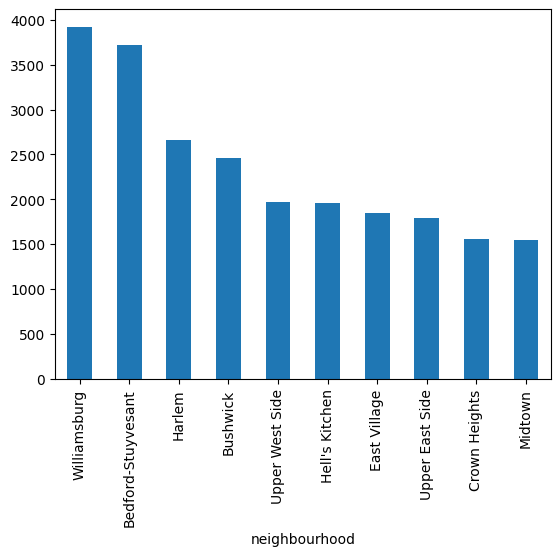

In [15]:
#BAR CHART
df['neighbourhood'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

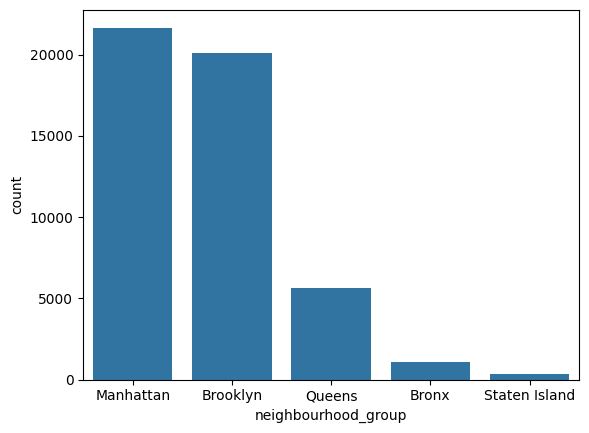

In [16]:
#Another way to get the same graph with seaborn
# sns.countplot(data=df,x='neighbourhood_group') #without order
#With order:
order=df['neighbourhood_group'].value_counts().index
sns.countplot(data=df,x='neighbourhood_group',order=order)

<Axes: xlabel='room_type', ylabel='count'>

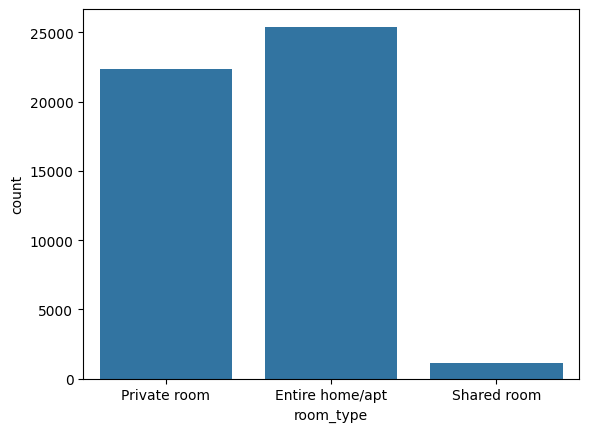

In [17]:
sns.countplot(data=df,x='room_type') #bar chart for room_type

<Axes: xlabel='neighbourhood_group', ylabel='count'>

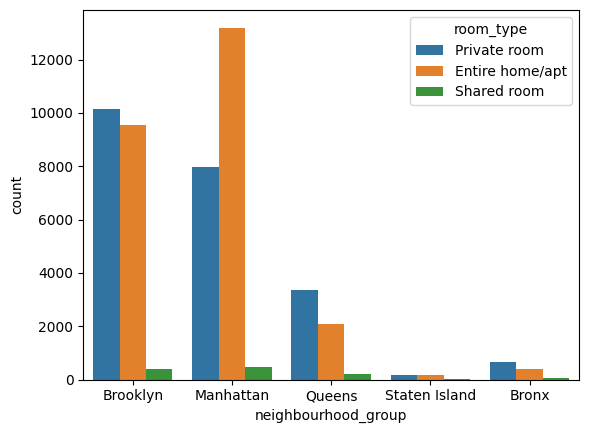

In [18]:
# What is the influence of neighbourhood_group on room_type?

df['room_type'].unique() # Output: 'Private room', 'Entire home/apt', 'Shared room'
# df['neighbourhood_group'].unique()

sns.countplot(data=df,x='neighbourhood_group',hue='room_type')

Distributions

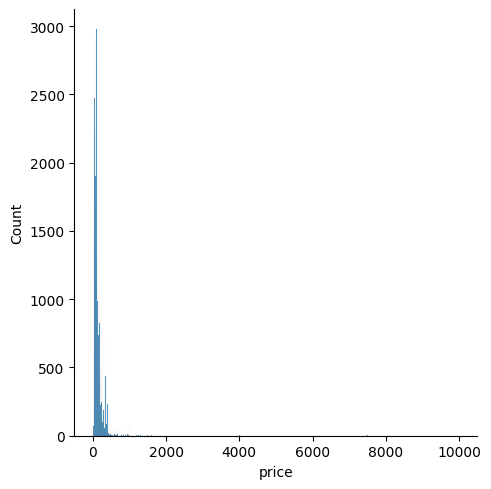

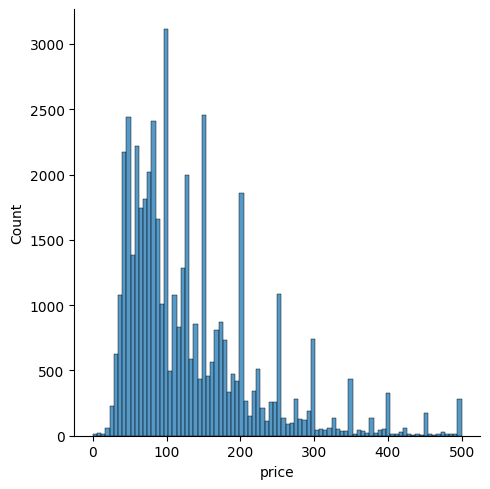

In [19]:
# What is the distribution of flat 'price' ? 

sns.displot(df['price']) #very big distribution

df[df['price']>1000].shape  #only 239 counts for price > 1000. So we can "zoom" the graph.

affordable_df = df[df['price']<=500]
sns.displot(affordable_df['price'])

In [20]:
# MEAN 

affordable_df['price'].mean() # mean price = 131

131.53056362458466

<Axes: xlabel='neighbourhood_group', ylabel='count'>

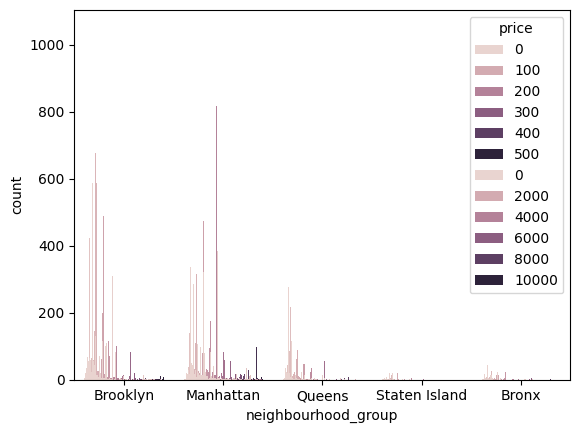

In [21]:
# What is the flat prices distribution based on neighbourhood_groups ? 

sns.countplot(data=affordable_df,x='neighbourhood_group',hue='price')

#or with all data:

sns.countplot(data=df,x='neighbourhood_group',hue='price')

C:\Users\Cristian Valiante\AppData\Local\Temp\ipykernel_10284\189072870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=affordable_df,x='neighbourhood_group',y='price',palette=colors)


<Axes: xlabel='neighbourhood_group', ylabel='price'>

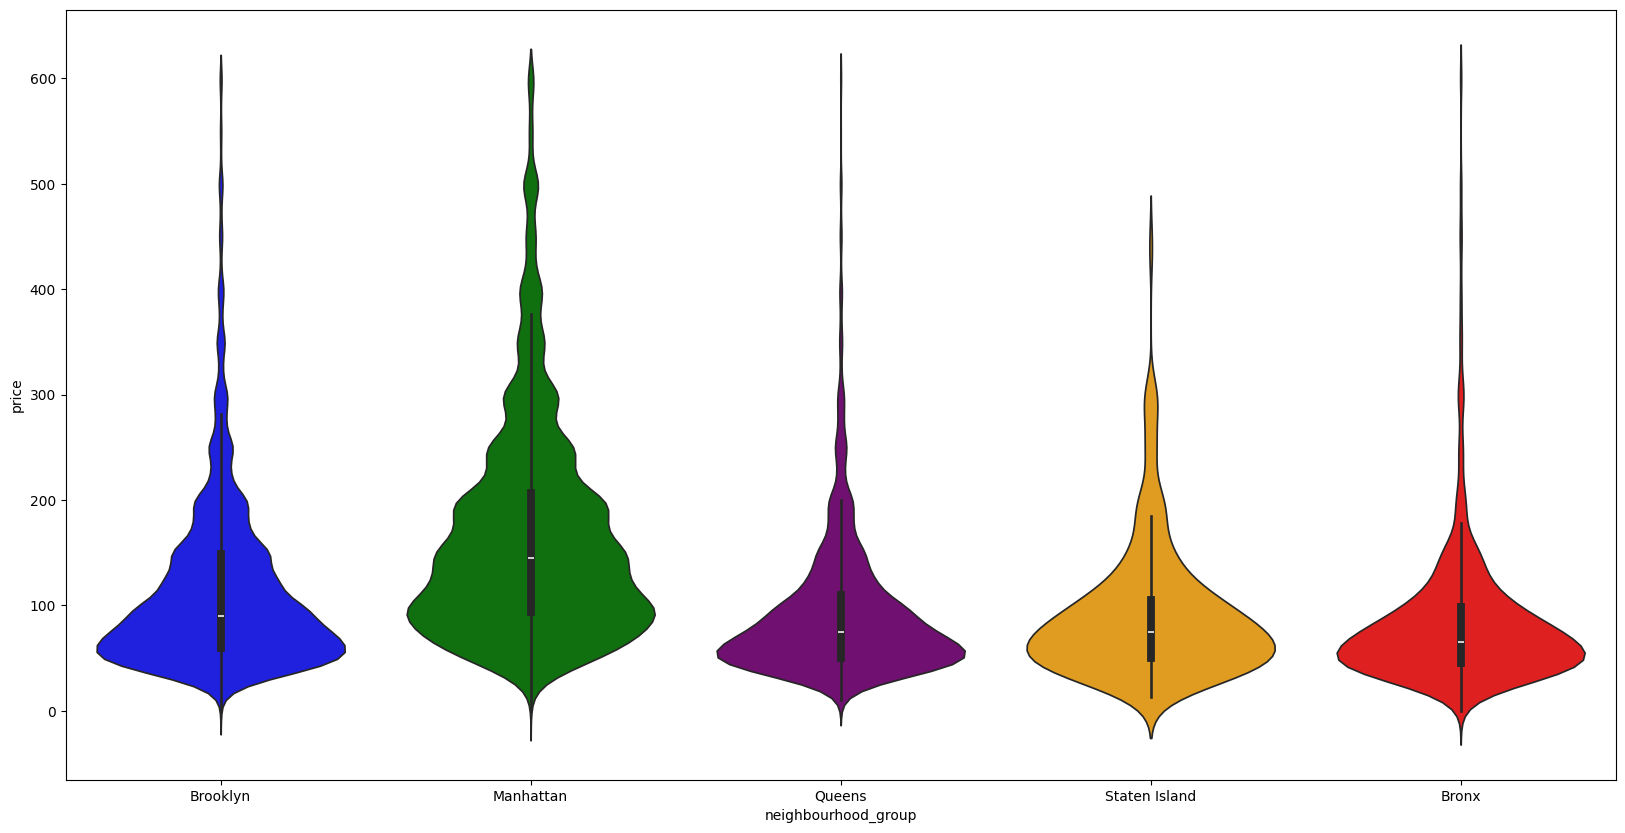

In [22]:
#VIOLIN PLOTS
# sns.violinplot(data=df,x='neighbourhood_group',y='price')

affordable_df = df[df['price']<=600]
colors = ['Blue', 'Green', 'Purple','Orange','Red']
plt.figure(figsize=(20,10))
sns.violinplot(data=affordable_df,x='neighbourhood_group',y='price',palette=colors)

<Axes: xlabel='longitude', ylabel='latitude'>

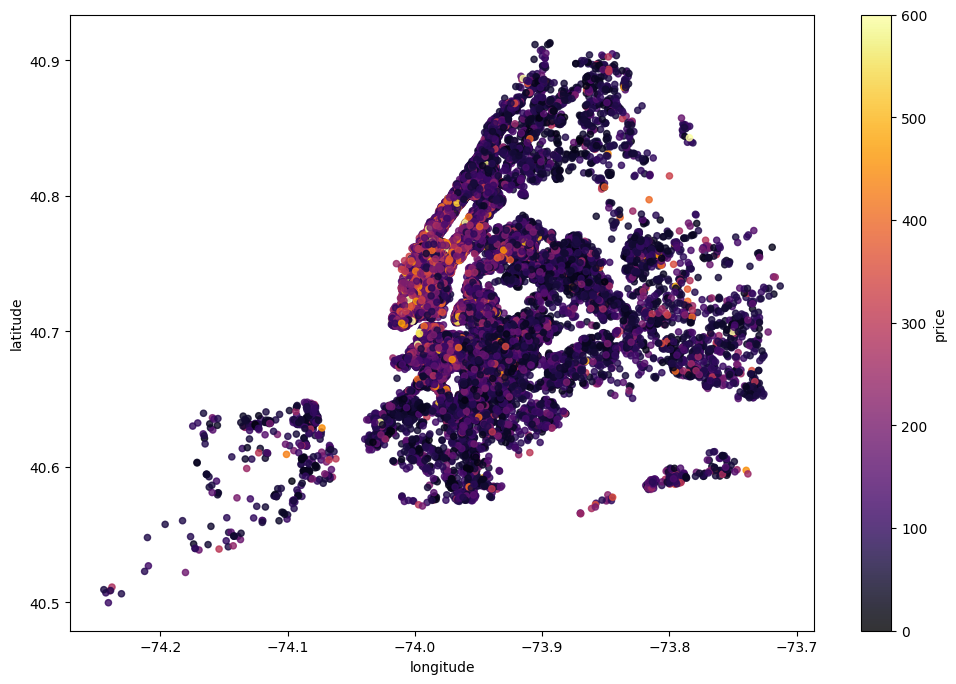

In [23]:
# Can we plot the listings on a map ? SCATTER PLOTS
affordable_df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8) 
)



C:\Users\Cristian Valiante\AppData\Local\Temp\ipykernel_10284\1502550822.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("New_York_City_.png")


<Axes: xlabel='longitude', ylabel='latitude'>

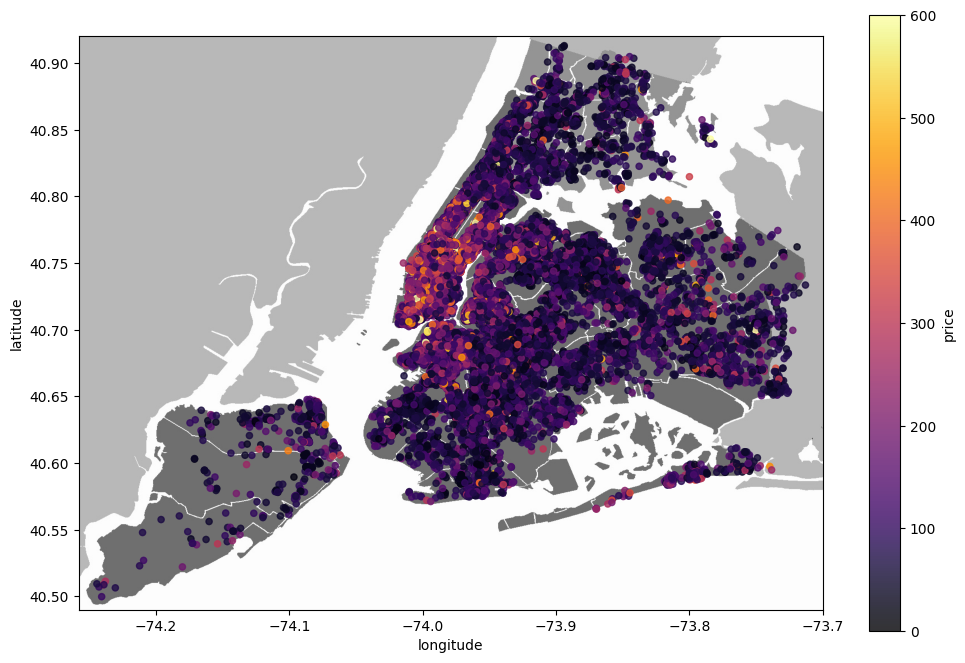

In [24]:
import imageio as iio
# read an image 
img = iio.imread("New_York_City_.png")

plt.imshow(img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

ax = plt.gca()
affordable_df.plot(
  ax=ax,
  zorder=1,
  kind='scatter',
  x='longitude',
  y='latitude',
  c='price',
  cmap='inferno',
  colorbar=True,
  alpha=0.8,
  figsize=(12,8)
)


API FETCHING

In [ ]:
import requests
url = "https:// ..."
response = requests.get(url) #get HTTP request
print(response.status_code) #should be 200 if OK
data = response.json() 

# TODO: load data in a Pandas dataframe

WEB SCRAPING

In [ ]:
from bs4 import BeautifulSoup
response=requests.get(url)
soup=BeautifulSoup(response.content,'html.parser')
# Query the soup object
soup.title.string
soup.find('h1')
soup.find_all('a')
# etc.
